In [4]:
# install gdown and download MNIST small data
!pip install gdown
!gdown 1km6g4_nipAYG3x3vNrtwtcQqVFFuWC0C
!unzip data_MNIST_small.zip
# install wandb
!pip install wandb
# install torch, torchvision, tqdm, matplotlib
!pip install torch torchvision tqdm matplotlib

In [2]:
# login to wandb
# you need to create new project in wandb.ai and paste your key when run below command
!wandb login

# set notebook config with wandb
import os
os.environ["WANDB_NOTEBOOK_NAME"] = 'wandb-demo'

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# Normal run

Epoch 1/10: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]


Epoch [1/10], Training Loss: 2.5947
Test Loss : 2.3629, Test Accuracy: 0.00 %


Epoch 2/10: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


Epoch [2/10], Training Loss: 2.2746
Test Loss : 2.3143, Test Accuracy: 0.00 %


Epoch 3/10: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


Epoch [3/10], Training Loss: 2.2255
Test Loss : 2.2655, Test Accuracy: 10.00 %


Epoch 4/10: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


Epoch [4/10], Training Loss: 2.0453
Test Loss : 2.2457, Test Accuracy: 40.00 %


Epoch 5/10: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]


Epoch [5/10], Training Loss: 1.8887
Test Loss : 2.2663, Test Accuracy: 40.00 %


Epoch 6/10: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]


Epoch [6/10], Training Loss: 1.6999
Test Loss : 2.2921, Test Accuracy: 0.00 %


Epoch 7/10: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]


Epoch [7/10], Training Loss: 1.5540
Test Loss : 2.2979, Test Accuracy: 0.00 %


Epoch 8/10: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


Epoch [8/10], Training Loss: 1.4271
Test Loss : 2.2795, Test Accuracy: 0.00 %


Epoch 9/10: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]


Epoch [9/10], Training Loss: 1.3269
Test Loss : 2.2460, Test Accuracy: 0.00 %


Epoch 10/10: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


Epoch [10/10], Training Loss: 1.2607
Test Loss : 2.2017, Test Accuracy: 10.00 %


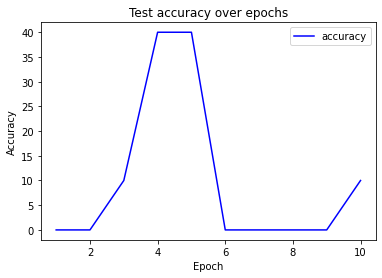

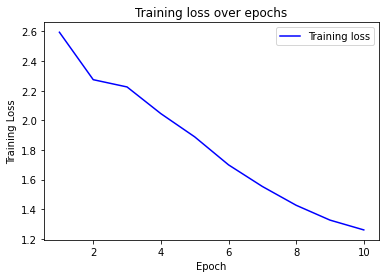

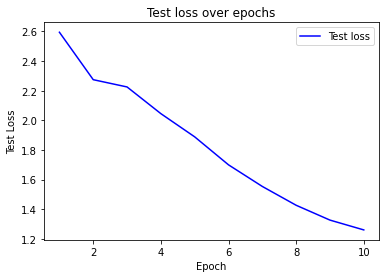

<Figure size 432x288 with 0 Axes>

In [5]:
# The normal code for training, testing and plot by matplotlib
############ parameters
test_path = "./data_MNIST_small/test/"
train_path = "./data_MNIST_small/train/"
num_epochs = 10
batch_size = 100
learning_rate = 0.001
############

import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from tqdm import tqdm
import matplotlib.pyplot as plt


transform = transforms.Compose([
    transforms.Resize((28, 28)),  # resize the images to 28x28 pixels
    transforms.Grayscale(num_output_channels=1),  # convert to grayscale
    transforms.ToTensor()  # convert to a PyTorch tensor
])

# Load dataset
train_dataset = datasets.ImageFolder(root=train_path, transform=transform)
test_dataset = datasets.ImageFolder(root=test_path, transform=transform)


# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the convolutional neural network architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

# Create the model and loss function
model = CNN()
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# save accuracy, train_loss, test_loss to plot
acc_arr = []
test_arr = []
train_arr = []

# Train the model and test after each epoch
for epoch in range(num_epochs):
    # Train step
    model.train()
    train_loss = 0
    for images, labels in tqdm(train_loader, desc="Epoch {}/{}".format(epoch+1, num_epochs)):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Compute the average training loss
    train_loss /= len(train_loader)
    train_arr.append(train_loss)
    print ('Epoch [{}/{}], Training Loss: {:.4f}'.format(epoch+1, num_epochs, train_loss))

    # Test step
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        test_loss = 0
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Compute the average test loss and accuracy
        test_loss /= len(test_loader)
        test_accuracy = 100 * correct / total
        acc_arr.append(test_accuracy)
        test_arr.append(test_loss)
        print('Test Loss : {:.4f}, Test Accuracy: {:.2f} %'.format(test_loss, test_accuracy))


# plot
epochs = range(1, len(acc_arr) + 1)

# Create the plot
plt.plot(epochs, acc_arr, 'b-', label='accuracy')
plt.title('Test accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('acc.png')
plt.show()
plt.clf()


plt.plot(epochs, train_arr, 'b-', label='Training loss')
plt.title('Training loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.savefig('training_loss.png')
plt.show()
plt.clf()

plt.plot(epochs, train_arr, 'b-', label='Test loss')
plt.title('Test loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.legend()
plt.savefig('test_loss.png')
plt.show()
plt.clf()

# Plot with wandb

In [7]:
###################
project_name = "test-wandb"
test_path = "./data_MNIST_small/test/"
train_path = "./data_MNIST_small/train/"
num_epochs = 10
batch_size = 100
learning_rate = 0.001
###################
import wandb
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from tqdm import tqdm
import matplotlib.pyplot as plt

# [WANDB INIT] init wandb
run = wandb.init(project=project_name)

In [8]:
%%wandb

transform = transforms.Compose([
    transforms.Resize((28, 28)),  # resize the images to 28x28 pixels
    transforms.Grayscale(num_output_channels=1),  # convert to grayscale
    transforms.ToTensor()  # convert to a PyTorch tensor
])

# Load dataset
train_dataset = datasets.ImageFolder(root=train_path, transform=transform)
test_dataset = datasets.ImageFolder(root=test_path, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the convolutional neural network architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

# Create the model and loss function
model = CNN()
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model and test after each epoch
for epoch in range(num_epochs):
    # Train step
    model.train()
    train_loss = 0
    for images, labels in tqdm(train_loader, desc="Epoch {}/{}".format(epoch+1, num_epochs)):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Compute the average training loss
    train_loss /= len(train_loader)
    print ('Epoch [{}/{}], Training Loss: {:.4f}'.format(epoch+1, num_epochs, train_loss))

    # Test step
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        test_loss = 0
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Compute the average test loss and accuracy
        test_loss /= len(test_loader)
        test_accuracy = 100 * correct / total
        print('Test Loss : {:.4f}, Test Accuracy: {:.2f} %'.format(test_loss, test_accuracy))
    
    # [WANDB LOG] log epoch, train_loss, test_loss, test_accracy after a epoch
    wandb.log({"epoch": epoch, "train_loss": train_loss, "test_loss": test_loss, "test_accuracy": test_accuracy})

# [WANDB FINISH]
wandb.finish()

Epoch 1/10: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


Epoch [1/10], Training Loss: 2.3683
Test Loss : 2.2793, Test Accuracy: 0.00 %


Epoch 2/10: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]


Epoch [2/10], Training Loss: 2.3374
Test Loss : 2.3117, Test Accuracy: 0.00 %


Epoch 3/10: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]


Epoch [3/10], Training Loss: 2.1790
Test Loss : 2.3432, Test Accuracy: 0.00 %


Epoch 4/10: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]


Epoch [4/10], Training Loss: 1.9499
Test Loss : 2.3353, Test Accuracy: 0.00 %


Epoch 5/10: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]


Epoch [5/10], Training Loss: 1.8271
Test Loss : 2.3095, Test Accuracy: 10.00 %


Epoch 6/10: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]


Epoch [6/10], Training Loss: 1.7214
Test Loss : 2.2847, Test Accuracy: 10.00 %


Epoch 7/10: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]


Epoch [7/10], Training Loss: 1.6460
Test Loss : 2.2663, Test Accuracy: 10.00 %


Epoch 8/10: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]


Epoch [8/10], Training Loss: 1.5307
Test Loss : 2.2515, Test Accuracy: 0.00 %


Epoch 9/10: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]


Epoch [9/10], Training Loss: 1.3955
Test Loss : 2.2349, Test Accuracy: 0.00 %


Epoch 10/10: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Epoch [10/10], Training Loss: 1.2881
Test Loss : 2.2199, Test Accuracy: 10.00 %


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁▁▁▁███▁▁█
test_loss,▄▆██▆▅▄▃▂▁
train_loss,██▇▅▄▄▃▃▂▁
epoch,9
test_accuracy,10.0
test_loss,2.21994
train_loss,1.28808


# Wandb take config from init, log images, table, plot line, alert

In [ ]:
############parameters
test_path = "./data_MNIST_small/test/"
train_path = "./data_MNIST_small/train/"
batch_size = 20
num_epochs = 10
learning_rate = 0.001
############

import wandb
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from tqdm import tqdm
import matplotlib.pyplot as plt

# [WANDB INIT] init wandb
run = wandb.init(project="test-wandb", name = "my-run", config={
    "batch_size": batch_size,
    "num_epochs": num_epochs,
    "learning_rate" : learning_rate
})



num_epochs = wandb.config.num_epochs # take from wandb config config
batch_size = wandb.config.batch_size # take from wandb config batch size
learning_rate = wandb.config.learning_rate # take from wandb config learning rate

transform = transforms.Compose([
    transforms.Resize((28, 28)),  # resize the images to 28x28 pixels
    transforms.Grayscale(num_output_channels=1),  # convert to grayscale
    transforms.ToTensor()  # convert to a PyTorch tensor
])

# Load dataset
train_dataset = datasets.ImageFolder(root=train_path, transform=transform)
test_dataset = datasets.ImageFolder(root=test_path, transform=transform)


# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the convolutional neural network architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

# Create the model and loss function
model = CNN()
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model and test after each epoch
for epoch in range(num_epochs):
    # Train step
    model.train()
    train_loss = 0
    for images, labels in tqdm(train_loader, desc="Epoch {}/{}".format(epoch+1, num_epochs)):
        # [WANDB.LOG] save first train image each epoch
        image_save = wandb.Image(images[0], caption="Train Image")

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Compute the average training loss
    train_loss /= len(train_loader)
    print ('Epoch [{}/{}], Training Loss: {:.4f}'.format(epoch+1, num_epochs, train_loss))

    # Test step
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        test_loss = 0
        for images, labels in test_loader:
            # [WANDB.LOG] save first test image each epoch 
            image_save = wandb.Image(images[0], caption="Test Image")

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Compute the average test loss and accuracy
        test_loss /= len(test_loader)
        test_accuracy = 100 * correct / total
        print('Test Loss : {:.4f}, Test Accuracy: {:.2f} %'.format(test_loss, test_accuracy))
    
    # [WANDB.LOG] log plot epoch, train_loss, test_loss, accuracy
    wandb.log({"epoch": epoch, 
               "train_loss": train_loss, 
               "test_loss": test_loss, 
               "test_accuracy": test_accuracy,
               "image_train": image_save,
               "image_test": image_save,
               })


# [WANDB.LOG] log table
import pandas as pd 
my_df = pd.DataFrame({"epoch": [1,2,3,4,5], "acc": [0.2, 0.5, 0.7, 0.6, 1.0], "loss": [1.0, 0.1, 0.05, 0.1, 0.02]})
wandb.log({"table": my_df})

# [WANDB.LOG] log plot line
data =  [[1, 0.2], [2, 0.5], [3, 0.7], [4, 0.6], [5, 1.0]]
table = wandb.Table(data=data, columns = ["epoch", "acc"])
wandb.log({"my_custom_plot_id" : wandb.plot.line(table, "x", "y", title="Custom Y vs X Line Plot")})

# [WANDB.ALERT] alert when finish
from wandb import AlertLevel
wandb.alert(
  title="Finish run", 
  text="Finish run",
  level=AlertLevel.INFO,
  wait_duration=300
)
# [WANDB FINISH]
wandb.finish()

Epoch 1/10: 100%|██████████| 3/3 [00:00<00:00,  5.75it/s]


Epoch [1/10], Training Loss: 3.8378
Test Loss : 2.2379, Test Accuracy: 20.00 %


Epoch 2/10: 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]


Epoch [2/10], Training Loss: 2.1385
Test Loss : 2.3462, Test Accuracy: 0.00 %


Epoch 3/10: 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]


Epoch [3/10], Training Loss: 1.9526
Test Loss : 2.3928, Test Accuracy: 0.00 %


Epoch 4/10: 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]


Epoch [4/10], Training Loss: 2.0326
Test Loss : 2.3048, Test Accuracy: 0.00 %


Epoch 5/10: 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]


Epoch [5/10], Training Loss: 1.7746
Test Loss : 2.1572, Test Accuracy: 50.00 %


Epoch 6/10: 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]


Epoch [6/10], Training Loss: 1.5642
Test Loss : 2.0783, Test Accuracy: 50.00 %


Epoch 7/10: 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]


Epoch [7/10], Training Loss: 1.3739
Test Loss : 2.0380, Test Accuracy: 50.00 %


Epoch 8/10: 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]


Epoch [8/10], Training Loss: 1.1584
Test Loss : 2.0343, Test Accuracy: 70.00 %


Epoch 9/10: 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]


Epoch [9/10], Training Loss: 1.0350
Test Loss : 2.0433, Test Accuracy: 50.00 %


Epoch 10/10: 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


Epoch [10/10], Training Loss: 0.9349
Test Loss : 1.9895, Test Accuracy: 60.00 %


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▃▁▁▁▆▆▆█▆▇
test_loss,▅▇█▆▄▃▂▂▂▁
train_loss,█▄▃▄▃▃▂▂▁▁
epoch,9
test_accuracy,60.0
test_loss,1.98953
train_loss,0.93491


# Use run 

In [ ]:
##########
run_name = "dupham2206/test-wandb/z26vu3hj" # YOU NEED TO CONFIG TO YOUR RUN NAME
# take your run format <entity>/<project>/<run_id> with entity is 
# your personal name or team's name, project is your name project
##########

import wandb
api = wandb.Api()
run = api.run(run_name)
print(run.config)

{'batch_size': 20, 'num_epochs': 10, 'learning_rate': 0.001}


In [ ]:
print(run.history())

In [ ]:
print(run.summary)

{'epoch': 9, 'table': {'ncols': 3, 'nrows': 5, 'sha256': 'b24fdb7af93e685983d57cc29a034da31435b75037dc91b4023dc8bda11574ed', 'artifact_path': 'wandb-client-artifact://uqa5kinn66i2ssr3ttq4ohpjaku44pxh6cgym33ny0ii5owh3nygxkqwnnhxyts1zf8othtluw0o4e59k6lg2x5xsziyp4g316c8c2yhgtzupo28btyh1mcziept68b7:latest/table.table.json', '_latest_artifact_path': 'wandb-client-artifact://uqa5kinn66i2ssr3ttq4ohpjaku44pxh6cgym33ny0ii5owh3nygxkqwnnhxyts1zf8othtluw0o4e59k6lg2x5xsziyp4g316c8c2yhgtzupo28btyh1mcziept68b7:latest/table.table.json', 'path': 'media/table/table_50_b24fdb7af93e685983d5.table.json', 'size': 124, '_type': 'table-file'}, '_runtime': 9.077155113220217, '_timestamp': 1676795766.6256082, 'image_train': {'_type': 'image-file', 'width': 28, 'format': 'png', 'height': 28, 'sha256': 'aacdcf186f74d25351772e4452f36c198ca8eb2db804374a33e76eb5597b5766', 'caption': 'Train Image', 'path': 'media/images/image_train_47_aacdcf186f74d2535177.png', 'size': 653}, 'test_accuracy': 60, 'my_custom_plot_id_ta

# Artifact

In [ ]:
# ADD DATA AND LOG ARTIFACT

############
project_name = "test-wandb"
dataset_name = "my-dataset"
local_data_folder = "/content/data_MNIST_small"
############
import wandb

wandb.init(project=project_name)

# Create a new artifact
my_artifact = wandb.Artifact(dataset_name, type="dataset")

# Add a directory to the artifact
my_artifact.add_dir(local_data_folder)

# Log the artifact
wandb.log_artifact(my_artifact)
wandb.finish()

wandb: Adding directory to artifact (/content/data_MNIST_small)... Done. 0.1s


In [ ]:
# TAKE DATA FROM ARTIFACT, TRAIN MODEL AND LOG MODEL ARTIFACT

############parameters
batch_size = 20
num_epochs = 10
learning_rate = 0.001
artifact_data_path = 'dupham2206/test-wandb/my-dataset:v0'
############

import wandb
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from tqdm import tqdm
import matplotlib.pyplot as plt

# [WANDB INIT] init wandb
run = wandb.init(project="test-wandb", name = "my-run", config={
    "batch_size": batch_size,
    "num_epochs": num_epochs,
    "learning_rate" : learning_rate
})




artifact = run.use_artifact(artifact_data_path, type='dataset')
data_MNIST_small = artifact.download()

test_path = data_MNIST_small + "/test/"
train_path = data_MNIST_small + "/train/"
num_epochs = wandb.config.num_epochs # take from wandb config config
batch_size = wandb.config.batch_size # take from wandb config batch size
learning_rate = wandb.config.learning_rate # take from wandb config learning rate

transform = transforms.Compose([
    transforms.Resize((28, 28)),  # resize the images to 28x28 pixels
    transforms.Grayscale(num_output_channels=1),  # convert to grayscale
    transforms.ToTensor()  # convert to a PyTorch tensor
])

# Load dataset
train_dataset = datasets.ImageFolder(root=train_path, transform=transform)
test_dataset = datasets.ImageFolder(root=test_path, transform=transform)


# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the convolutional neural network architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

# Create the model and loss function
model = CNN()
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model and test after each epoch
for epoch in range(num_epochs):
    # Train step
    model.train()
    train_loss = 0
    for images, labels in tqdm(train_loader, desc="Epoch {}/{}".format(epoch+1, num_epochs)):
        # [WANDB.LOG] save first train image each epoch
        image_save = wandb.Image(images[0], caption="Train Image")

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Compute the average training loss
    train_loss /= len(train_loader)
    print ('Epoch [{}/{}], Training Loss: {:.4f}'.format(epoch+1, num_epochs, train_loss))

    # Test step
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        test_loss = 0
        for images, labels in test_loader:
            # [WANDB.LOG] save first test image each epoch 
            image_save = wandb.Image(images[0], caption="Test Image")

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Compute the average test loss and accuracy
        test_loss /= len(test_loader)
        test_accuracy = 100 * correct / total
        print('Test Loss : {:.4f}, Test Accuracy: {:.2f} %'.format(test_loss, test_accuracy))
    
    # [WANDB.LOG] log plot epoch, train_loss, test_loss, accuracy
    wandb.log({"epoch": epoch, 
               "train_loss": train_loss, 
               "test_loss": test_loss, 
               "test_accuracy": test_accuracy,
               "image_train": image_save,
               "image_test": image_save,
               })


# [WANDB.LOG] log table
import pandas as pd 
my_df = pd.DataFrame({"epoch": [1,2,3,4,5], "acc": [0.2, 0.5, 0.7, 0.6, 1.0], "loss": [1.0, 0.1, 0.05, 0.1, 0.02]})
wandb.log({"table": my_df})

# [WANDB.LOG] log plot line
data =  [[1, 0.2], [2, 0.5], [3, 0.7], [4, 0.6], [5, 1.0]]
table = wandb.Table(data=data, columns = ["epoch", "acc"])
wandb.log({"my_custom_plot_id" : wandb.plot.line(table, "x", "y", title="Custom Y vs X Line Plot")})

# [WANDB.ALERT] alert when finish
from wandb import AlertLevel
wandb.alert(
  title="Finish run", 
  text=f"Finish run",
  level=AlertLevel.INFO,
  wait_duration=300
)

# [ARTIFACT] log model
model_path = "./CNN.pt"
torch.save(model.state_dict(), model_path)

# Create a new artifact
my_artifact = wandb.Artifact("CNN.pt", type="model")

# Add a directory to the artifact
my_artifact.add_file(local_path=model_path, name="CNN.pt")

# Log the artifact
wandb.log_artifact(my_artifact)
wandb.finish()

wandb:   70 of 70 files downloaded.  
Epoch 1/10: 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]


Epoch [1/10], Training Loss: 3.8584
Test Loss : 2.1752, Test Accuracy: 20.00 %


Epoch 2/10: 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]


Epoch [2/10], Training Loss: 1.9947
Test Loss : 2.3060, Test Accuracy: 0.00 %


Epoch 3/10: 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


Epoch [3/10], Training Loss: 2.0037
Test Loss : 2.3379, Test Accuracy: 0.00 %


Epoch 4/10: 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


Epoch [4/10], Training Loss: 2.0434
Test Loss : 2.2231, Test Accuracy: 20.00 %


Epoch 5/10: 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]


Epoch [5/10], Training Loss: 1.8280
Test Loss : 2.0629, Test Accuracy: 70.00 %


Epoch 6/10: 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


Epoch [6/10], Training Loss: 1.5681
Test Loss : 2.0294, Test Accuracy: 50.00 %


Epoch 7/10: 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


Epoch [7/10], Training Loss: 1.3912
Test Loss : 2.0642, Test Accuracy: 50.00 %


Epoch 8/10: 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


Epoch [8/10], Training Loss: 1.2142
Test Loss : 2.0493, Test Accuracy: 50.00 %


Epoch 9/10: 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]


Epoch [9/10], Training Loss: 1.0600
Test Loss : 2.0030, Test Accuracy: 60.00 %


Epoch 10/10: 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]


Epoch [10/10], Training Loss: 0.9602
Test Loss : 1.9176, Test Accuracy: 60.00 %


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▃▁▁▃█▆▆▆▇▇
test_loss,▅▇█▆▃▃▃▃▂▁
train_loss,█▃▄▄▃▂▂▂▁▁
epoch,9
test_accuracy,60.0
test_loss,1.91756
train_loss,0.96015


In [ ]:
# USE MODEL ARTIFACT TO INFER

############
project_name = "test-wandb"
artifact_model_path = 'dupham2206/test-wandb/CNN.pt:v1'
model_name = "/CNN.pt"
############

import wandb

run = wandb.init(project=project_name)

# Create a new artifact
artifact = run.use_artifact(artifact_model_path, type='model')

# Add a directory to the artifact
model_path = artifact.download()
model = CNN()
model.load_state_dict(torch.load(model_path + model_name))
model.eval()
# Code to infer


wandb.finish()

wandb:   1 of 1 files downloaded.  


# sweep

In [ ]:
import wandb
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from tqdm import tqdm
import matplotlib.pyplot as plt

def train():

  config = wandb.init().config
  # Hyperparameters
  test_path = "./data_MNIST_small/test/"
  train_path = "./data_MNIST_small/train/"
  num_epochs = config.num_epochs
  batch_size = config.batch_size
  learning_rate = config.learning_rate

  transform = transforms.Compose([
      transforms.Resize((28, 28)),  # resize the images to 28x28 pixels
      transforms.Grayscale(num_output_channels=1),  # convert to grayscale
      transforms.ToTensor()  # convert to a PyTorch tensor
  ])

  # Load dataset
  train_dataset = datasets.ImageFolder(root=train_path, transform=transform)
  test_dataset = datasets.ImageFolder(root=test_path, transform=transform)


  # Create data loaders
  train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)
  test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

  # Define the convolutional neural network architecture
  class CNN(nn.Module):
      def __init__(self):
          super(CNN, self).__init__()
          self.layer1 = nn.Sequential(
              nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
              nn.BatchNorm2d(16),
              nn.ReLU(),
              nn.MaxPool2d(kernel_size=2, stride=2))
          self.layer2 = nn.Sequential(
              nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
              nn.BatchNorm2d(32),
              nn.ReLU(),
              nn.MaxPool2d(kernel_size=2, stride=2))
          self.fc = nn.Linear(7*7*32, 10)
          
      def forward(self, x):
          out = self.layer1(x)
          out = self.layer2(out)
          out = out.reshape(out.size(0), -1)
          out = self.fc(out)
          return out

  # Create the model and loss function
  model = CNN()
  criterion = nn.CrossEntropyLoss()

  # Define the optimizer
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  # Train the model and test after each epoch
  for epoch in range(num_epochs):
      # Train step
      model.train()
      train_loss = 0
      for images, labels in tqdm(train_loader, desc="Epoch {}/{}".format(epoch+1, num_epochs)):
          # Forward pass
          outputs = model(images)
          loss = criterion(outputs, labels)
          
          # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          train_loss += loss.item()

      # Compute the average training loss
      train_loss /= len(train_loader)
      print ('Epoch [{}/{}], Training Loss: {:.4f}'.format(epoch+1, num_epochs, train_loss))

    # Test step
  model.eval()
  with torch.no_grad():
      correct = 0
      total = 0
      test_loss = 0
      for images, labels in test_loader:
          outputs = model(images)
          loss = criterion(outputs, labels)
          test_loss += loss.item()
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      # Compute the average test loss and accuracy
      test_loss /= len(test_loader)
      test_accuracy = 100 * correct / total
      print('Test Loss : {:.4f}, Test Accuracy: {:.2f} %'.format(test_loss, test_accuracy))
    
  wandb.log({"epoch": epoch, "train_loss": train_loss, "test_loss": test_loss, "test_accuracy": test_accuracy})


wandb.finish()

In [ ]:

sweep_configuration = {
    'method': 'random',
    'name': 'sweep',
    'metric': {'goal': 'maximize', 'name': 'test_accuracy'},
    'parameters': 
    {
        'batch_size': {'values': [10, 20, 30]},
        'num_epochs': {'values': [5, 10, 15]},
        'learning_rate': {'max': 0.01, 'min': 0.001}
     }
}
sweep_id = wandb.sweep(sweep=sweep_configuration, project='test-wandb')
wandb.agent(sweep_id, function=train)

Error in callback <function _WandbInit._resume_backend at 0x7fd152996f70> (for pre_run_cell):


BrokenPipeError: ignored

Create sweep with ID: xzmj6rhq
Sweep URL: https://wandb.ai/dupham2206/test-wandb/sweeps/xzmj6rhq


wandb: Agent Starting Run: p2kp9auw with config:
wandb: 	batch_size: 10
wandb: 	learning_rate: 0.0039814112801012415
wandb: 	num_epochs: 5
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/5: 100%|██████████| 6/6 [00:00<00:00, 12.57it/s]


Epoch [1/5], Training Loss: 12.0560


Epoch 2/5: 100%|██████████| 6/6 [00:00<00:00, 13.15it/s]


Epoch [2/5], Training Loss: 2.9019


Epoch 3/5: 100%|██████████| 6/6 [00:00<00:00, 12.96it/s]


Epoch [3/5], Training Loss: 3.8711


Epoch 4/5: 100%|██████████| 6/6 [00:00<00:00, 13.21it/s]


Epoch [4/5], Training Loss: 2.7527


Epoch 5/5: 100%|██████████| 6/6 [00:00<00:00, 12.91it/s]


Epoch [5/5], Training Loss: 2.2675
Test Loss : 2.4451, Test Accuracy: 0.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,4
test_accuracy,0.0
test_loss,2.44513
train_loss,2.26751


wandb: Agent Starting Run: v68fye7k with config:
wandb: 	batch_size: 10
wandb: 	learning_rate: 0.002202934168820254
wandb: 	num_epochs: 5
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/5: 100%|██████████| 6/6 [00:00<00:00, 12.83it/s]


Epoch [1/5], Training Loss: 6.8341


Epoch 2/5: 100%|██████████| 6/6 [00:00<00:00, 12.94it/s]


Epoch [2/5], Training Loss: 2.4115


Epoch 3/5: 100%|██████████| 6/6 [00:00<00:00, 12.86it/s]


Epoch [3/5], Training Loss: 2.9655


Epoch 4/5: 100%|██████████| 6/6 [00:00<00:00, 12.65it/s]


Epoch [4/5], Training Loss: 2.2188


Epoch 5/5: 100%|██████████| 6/6 [00:00<00:00,  8.88it/s]


Epoch [5/5], Training Loss: 1.9415
Test Loss : 2.0829, Test Accuracy: 40.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,4
test_accuracy,40.0
test_loss,2.08286
train_loss,1.94151


wandb: Agent Starting Run: f0rtbsjy with config:
wandb: 	batch_size: 30
wandb: 	learning_rate: 0.003399663813710402
wandb: 	num_epochs: 5
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/5: 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]


Epoch [1/5], Training Loss: 6.5885


Epoch 2/5: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Epoch [2/5], Training Loss: 4.5135


Epoch 3/5: 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]


Epoch [3/5], Training Loss: 1.8696


Epoch 4/5: 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]


Epoch [4/5], Training Loss: 3.0110


Epoch 5/5: 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

Epoch [5/5], Training Loss: 3.0682
Test Loss : 2.6843, Test Accuracy: 20.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,4
test_accuracy,20.0
test_loss,2.68429
train_loss,3.06822


wandb: Agent Starting Run: jryrm9vf with config:
wandb: 	batch_size: 30
wandb: 	learning_rate: 0.00964327703598526
wandb: 	num_epochs: 10
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/10: 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]


Epoch [1/10], Training Loss: 13.7292


Epoch 2/10: 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]


Epoch [2/10], Training Loss: 11.7248


Epoch 3/10: 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]


Epoch [3/10], Training Loss: 3.9038


Epoch 4/10: 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]


Epoch [4/10], Training Loss: 6.7803


Epoch 5/10: 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]


Epoch [5/10], Training Loss: 6.5073


Epoch 6/10: 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]


Epoch [6/10], Training Loss: 4.7905


Epoch 7/10: 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]


Epoch [7/10], Training Loss: 4.0983


Epoch 8/10: 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]


Epoch [8/10], Training Loss: 3.8101


Epoch 9/10: 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]


Epoch [9/10], Training Loss: 3.7938


Epoch 10/10: 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

Epoch [10/10], Training Loss: 3.1540
Test Loss : 2.2154, Test Accuracy: 40.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,9
test_accuracy,40.0
test_loss,2.21545
train_loss,3.15404


wandb: Agent Starting Run: 16zeaavs with config:
wandb: 	batch_size: 20
wandb: 	learning_rate: 0.005927174215232181
wandb: 	num_epochs: 5
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/5: 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


Epoch [1/5], Training Loss: 12.0458


Epoch 2/5: 100%|██████████| 3/3 [00:00<00:00,  6.83it/s]


Epoch [2/5], Training Loss: 4.9004


Epoch 3/5: 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


Epoch [3/5], Training Loss: 3.9304


Epoch 4/5: 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]


Epoch [4/5], Training Loss: 4.0680


Epoch 5/5: 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


Epoch [5/5], Training Loss: 3.7061
Test Loss : 2.8949, Test Accuracy: 10.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,4
test_accuracy,10.0
test_loss,2.89486
train_loss,3.70613


wandb: Agent Starting Run: 9h2dquvw with config:
wandb: 	batch_size: 10
wandb: 	learning_rate: 0.005922808188566128
wandb: 	num_epochs: 5
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/5: 100%|██████████| 6/6 [00:00<00:00, 12.86it/s]


Epoch [1/5], Training Loss: 16.0297


Epoch 2/5: 100%|██████████| 6/6 [00:00<00:00, 13.09it/s]


Epoch [2/5], Training Loss: 3.9044


Epoch 3/5: 100%|██████████| 6/6 [00:00<00:00, 13.20it/s]


Epoch [3/5], Training Loss: 4.9303


Epoch 4/5: 100%|██████████| 6/6 [00:00<00:00, 13.16it/s]


Epoch [4/5], Training Loss: 2.9401


Epoch 5/5: 100%|██████████| 6/6 [00:00<00:00, 11.76it/s]

Epoch [5/5], Training Loss: 2.4662
Test Loss : 2.5400, Test Accuracy: 0.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,4
test_accuracy,0.0
test_loss,2.53999
train_loss,2.4662


wandb: Agent Starting Run: 36le3xzx with config:
wandb: 	batch_size: 10
wandb: 	learning_rate: 0.00646411174077782
wandb: 	num_epochs: 15
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/15: 100%|██████████| 6/6 [00:00<00:00,  8.57it/s]


Epoch [1/15], Training Loss: 16.1808


Epoch 2/15: 100%|██████████| 6/6 [00:00<00:00,  8.55it/s]


Epoch [2/15], Training Loss: 3.5834


Epoch 3/15: 100%|██████████| 6/6 [00:00<00:00,  9.32it/s]


Epoch [3/15], Training Loss: 5.0149


Epoch 4/15: 100%|██████████| 6/6 [00:00<00:00, 10.28it/s]


Epoch [4/15], Training Loss: 2.7367


Epoch 5/15: 100%|██████████| 6/6 [00:00<00:00, 13.18it/s]


Epoch [5/15], Training Loss: 2.4281


Epoch 6/15: 100%|██████████| 6/6 [00:00<00:00, 13.04it/s]


Epoch [6/15], Training Loss: 2.3701


Epoch 7/15: 100%|██████████| 6/6 [00:00<00:00, 13.22it/s]


Epoch [7/15], Training Loss: 1.9666


Epoch 8/15: 100%|██████████| 6/6 [00:00<00:00, 12.47it/s]


Epoch [8/15], Training Loss: 1.9306


Epoch 9/15: 100%|██████████| 6/6 [00:00<00:00, 13.10it/s]


Epoch [9/15], Training Loss: 1.7048


Epoch 10/15: 100%|██████████| 6/6 [00:00<00:00, 12.85it/s]


Epoch [10/15], Training Loss: 1.5662


Epoch 11/15: 100%|██████████| 6/6 [00:00<00:00, 13.08it/s]


Epoch [11/15], Training Loss: 1.4514


Epoch 12/15: 100%|██████████| 6/6 [00:00<00:00, 12.99it/s]


Epoch [12/15], Training Loss: 1.2832


Epoch 13/15: 100%|██████████| 6/6 [00:00<00:00, 13.27it/s]


Epoch [13/15], Training Loss: 1.1783


Epoch 14/15: 100%|██████████| 6/6 [00:00<00:00, 13.17it/s]


Epoch [14/15], Training Loss: 1.0165


Epoch 15/15: 100%|██████████| 6/6 [00:00<00:00, 12.91it/s]


Epoch [15/15], Training Loss: 0.9036
Test Loss : 2.1884, Test Accuracy: 50.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,14
test_accuracy,50.0
test_loss,2.18836
train_loss,0.90356


wandb: Agent Starting Run: 9l699y0x with config:
wandb: 	batch_size: 30
wandb: 	learning_rate: 0.009707979192466637
wandb: 	num_epochs: 10
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/10: 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]


Epoch [1/10], Training Loss: 13.3424


Epoch 2/10: 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]


Epoch [2/10], Training Loss: 11.1764


Epoch 3/10: 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]


Epoch [3/10], Training Loss: 3.2945


Epoch 4/10: 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]


Epoch [4/10], Training Loss: 6.4099


Epoch 5/10: 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]


Epoch [5/10], Training Loss: 6.3686


Epoch 6/10: 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]


Epoch [6/10], Training Loss: 4.7010


Epoch 7/10: 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]


Epoch [7/10], Training Loss: 3.9258


Epoch 8/10: 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]


Epoch [8/10], Training Loss: 3.4134


Epoch 9/10: 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]


Epoch [9/10], Training Loss: 2.8554


Epoch 10/10: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

Epoch [10/10], Training Loss: 1.9110
Test Loss : 4.2769, Test Accuracy: 10.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,9
test_accuracy,10.0
test_loss,4.27688
train_loss,1.91097


wandb: Agent Starting Run: jwplc48i with config:
wandb: 	batch_size: 30
wandb: 	learning_rate: 0.00964981666586842
wandb: 	num_epochs: 15
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/15: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]


Epoch [1/15], Training Loss: 13.3872


Epoch 2/15: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


Epoch [2/15], Training Loss: 11.5793


Epoch 3/15: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Epoch [3/15], Training Loss: 4.2192


Epoch 4/15: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


Epoch [4/15], Training Loss: 6.5470


Epoch 5/15: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]


Epoch [5/15], Training Loss: 5.8285


Epoch 6/15: 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]


Epoch [6/15], Training Loss: 4.5899


Epoch 7/15: 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]


Epoch [7/15], Training Loss: 3.8201


Epoch 8/15: 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]


Epoch [8/15], Training Loss: 3.4047


Epoch 9/15: 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]


Epoch [9/15], Training Loss: 3.0210


Epoch 10/15: 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]


Epoch [10/15], Training Loss: 2.2916


Epoch 11/15: 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]


Epoch [11/15], Training Loss: 1.9997


Epoch 12/15: 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]


Epoch [12/15], Training Loss: 2.0943


Epoch 13/15: 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]


Epoch [13/15], Training Loss: 1.8045


Epoch 14/15: 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]


Epoch [14/15], Training Loss: 1.4782


Epoch 15/15: 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

Epoch [15/15], Training Loss: 1.4547
Test Loss : 2.5598, Test Accuracy: 40.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,14
test_accuracy,40.0
test_loss,2.55976
train_loss,1.45472


wandb: Agent Starting Run: 1qxv1i23 with config:
wandb: 	batch_size: 10
wandb: 	learning_rate: 0.006787141776512393
wandb: 	num_epochs: 5
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/5: 100%|██████████| 6/6 [00:00<00:00, 12.37it/s]


Epoch [1/5], Training Loss: 17.0711


Epoch 2/5: 100%|██████████| 6/6 [00:00<00:00, 12.83it/s]


Epoch [2/5], Training Loss: 4.0966


Epoch 3/5: 100%|██████████| 6/6 [00:00<00:00, 12.81it/s]


Epoch [3/5], Training Loss: 4.8806


Epoch 4/5: 100%|██████████| 6/6 [00:00<00:00, 12.93it/s]


Epoch [4/5], Training Loss: 2.8001


Epoch 5/5: 100%|██████████| 6/6 [00:00<00:00, 12.66it/s]


Epoch [5/5], Training Loss: 2.3342
Test Loss : 2.5260, Test Accuracy: 10.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,4
test_accuracy,10.0
test_loss,2.52602
train_loss,2.33424


wandb: Agent Starting Run: gidjqnpz with config:
wandb: 	batch_size: 20
wandb: 	learning_rate: 0.007418927343315781
wandb: 	num_epochs: 10
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/10: 100%|██████████| 3/3 [00:00<00:00,  6.23it/s]


Epoch [1/10], Training Loss: 14.8918


Epoch 2/10: 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]


Epoch [2/10], Training Loss: 5.2408


Epoch 3/10: 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


Epoch [3/10], Training Loss: 3.9232


Epoch 4/10: 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


Epoch [4/10], Training Loss: 5.2639


Epoch 5/10: 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


Epoch [5/10], Training Loss: 4.2395


Epoch 6/10: 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]


Epoch [6/10], Training Loss: 2.4190


Epoch 7/10: 100%|██████████| 3/3 [00:00<00:00,  6.27it/s]


Epoch [7/10], Training Loss: 2.4264


Epoch 8/10: 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]


Epoch [8/10], Training Loss: 2.1793


Epoch 9/10: 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]


Epoch [9/10], Training Loss: 2.1101


Epoch 10/10: 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]

Epoch [10/10], Training Loss: 1.6805
Test Loss : 1.9764, Test Accuracy: 30.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,9
test_accuracy,30.0
test_loss,1.97638
train_loss,1.68051


wandb: Agent Starting Run: 9mq3okno with config:
wandb: 	batch_size: 10
wandb: 	learning_rate: 0.001541811933148318
wandb: 	num_epochs: 5
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/5: 100%|██████████| 6/6 [00:00<00:00, 12.06it/s]


Epoch [1/5], Training Loss: 6.5647


Epoch 2/5: 100%|██████████| 6/6 [00:00<00:00,  8.83it/s]


Epoch [2/5], Training Loss: 2.2122


Epoch 3/5: 100%|██████████| 6/6 [00:00<00:00,  8.80it/s]


Epoch [3/5], Training Loss: 2.6092


Epoch 4/5: 100%|██████████| 6/6 [00:00<00:00,  8.79it/s]


Epoch [4/5], Training Loss: 2.3179


Epoch 5/5: 100%|██████████| 6/6 [00:00<00:00,  9.00it/s]


Epoch [5/5], Training Loss: 1.8447
Test Loss : 2.1878, Test Accuracy: 0.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,4
test_accuracy,0.0
test_loss,2.18779
train_loss,1.84467


wandb: Agent Starting Run: z8p9n8mj with config:
wandb: 	batch_size: 20
wandb: 	learning_rate: 0.009179545201143412
wandb: 	num_epochs: 10
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/10: 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]


Epoch [1/10], Training Loss: 15.5473


Epoch 2/10: 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]


Epoch [2/10], Training Loss: 4.9104


Epoch 3/10: 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]


Epoch [3/10], Training Loss: 5.1709


Epoch 4/10: 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


Epoch [4/10], Training Loss: 5.8236


Epoch 5/10: 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]


Epoch [5/10], Training Loss: 4.5037


Epoch 6/10: 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]


Epoch [6/10], Training Loss: 2.7164


Epoch 7/10: 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]


Epoch [7/10], Training Loss: 2.3201


Epoch 8/10: 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]


Epoch [8/10], Training Loss: 2.2844


Epoch 9/10: 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


Epoch [9/10], Training Loss: 1.8505


Epoch 10/10: 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


Epoch [10/10], Training Loss: 1.3853
Test Loss : 2.7734, Test Accuracy: 20.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,9
test_accuracy,20.0
test_loss,2.77343
train_loss,1.3853


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: bjizmdz6 with config:
wandb: 	batch_size: 10
wandb: 	learning_rate: 0.004437218375998318
wandb: 	num_epochs: 5
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/5: 100%|██████████| 6/6 [00:00<00:00, 12.40it/s]


Epoch [1/5], Training Loss: 12.5495


Epoch 2/5: 100%|██████████| 6/6 [00:00<00:00, 12.25it/s]


Epoch [2/5], Training Loss: 3.0353


Epoch 3/5: 100%|██████████| 6/6 [00:00<00:00, 12.54it/s]


Epoch [3/5], Training Loss: 3.9178


Epoch 4/5: 100%|██████████| 6/6 [00:00<00:00, 12.81it/s]


Epoch [4/5], Training Loss: 2.5866


Epoch 5/5: 100%|██████████| 6/6 [00:00<00:00, 12.57it/s]


Epoch [5/5], Training Loss: 2.1822
Test Loss : 2.3612, Test Accuracy: 0.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,4
test_accuracy,0.0
test_loss,2.36123
train_loss,2.18223


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: sjbmyifl with config:
wandb: 	batch_size: 10
wandb: 	learning_rate: 0.007008617231913315
wandb: 	num_epochs: 15
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/15: 100%|██████████| 6/6 [00:00<00:00, 12.84it/s]


Epoch [1/15], Training Loss: 17.0929


Epoch 2/15: 100%|██████████| 6/6 [00:00<00:00, 12.63it/s]


Epoch [2/15], Training Loss: 3.8578


Epoch 3/15: 100%|██████████| 6/6 [00:00<00:00, 12.83it/s]


Epoch [3/15], Training Loss: 4.7721


Epoch 4/15: 100%|██████████| 6/6 [00:00<00:00, 11.74it/s]


Epoch [4/15], Training Loss: 2.5376


Epoch 5/15: 100%|██████████| 6/6 [00:00<00:00, 12.32it/s]


Epoch [5/15], Training Loss: 2.3678


Epoch 6/15: 100%|██████████| 6/6 [00:00<00:00, 12.50it/s]


Epoch [6/15], Training Loss: 2.1605


Epoch 7/15: 100%|██████████| 6/6 [00:00<00:00, 12.75it/s]


Epoch [7/15], Training Loss: 1.7496


Epoch 8/15: 100%|██████████| 6/6 [00:00<00:00, 12.52it/s]


Epoch [8/15], Training Loss: 1.7386


Epoch 9/15: 100%|██████████| 6/6 [00:00<00:00, 12.80it/s]


Epoch [9/15], Training Loss: 1.4098


Epoch 10/15: 100%|██████████| 6/6 [00:00<00:00, 12.70it/s]


Epoch [10/15], Training Loss: 1.3106


Epoch 11/15: 100%|██████████| 6/6 [00:00<00:00, 12.91it/s]


Epoch [11/15], Training Loss: 1.1119


Epoch 12/15: 100%|██████████| 6/6 [00:00<00:00, 12.61it/s]


Epoch [12/15], Training Loss: 0.9558


Epoch 13/15: 100%|██████████| 6/6 [00:00<00:00, 12.97it/s]


Epoch [13/15], Training Loss: 0.8146


Epoch 14/15: 100%|██████████| 6/6 [00:00<00:00, 12.89it/s]


Epoch [14/15], Training Loss: 0.6935


Epoch 15/15: 100%|██████████| 6/6 [00:00<00:00, 13.04it/s]


Epoch [15/15], Training Loss: 0.5595
Test Loss : 2.3837, Test Accuracy: 60.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,14
test_accuracy,60.0
test_loss,2.38369
train_loss,0.55948


wandb: Agent Starting Run: l7h3nuzu with config:
wandb: 	batch_size: 10
wandb: 	learning_rate: 0.005093746243178588
wandb: 	num_epochs: 5
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/5: 100%|██████████| 6/6 [00:00<00:00, 12.59it/s]


Epoch [1/5], Training Loss: 14.4216


Epoch 2/5: 100%|██████████| 6/6 [00:00<00:00,  9.59it/s]


Epoch [2/5], Training Loss: 3.2752


Epoch 3/5: 100%|██████████| 6/6 [00:00<00:00,  9.32it/s]


Epoch [3/5], Training Loss: 4.5020


Epoch 4/5: 100%|██████████| 6/6 [00:00<00:00,  8.46it/s]


Epoch [4/5], Training Loss: 2.9606


Epoch 5/5: 100%|██████████| 6/6 [00:00<00:00,  8.81it/s]


Epoch [5/5], Training Loss: 2.2605
Test Loss : 2.4891, Test Accuracy: 0.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,4
test_accuracy,0.0
test_loss,2.48908
train_loss,2.26052


wandb: Agent Starting Run: rh0zbeew with config:
wandb: 	batch_size: 20
wandb: 	learning_rate: 0.002284646832239316
wandb: 	num_epochs: 10
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/10: 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]


Epoch [1/10], Training Loss: 6.6270


Epoch 2/10: 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


Epoch [2/10], Training Loss: 2.8501


Epoch 3/10: 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


Epoch [3/10], Training Loss: 2.4090


Epoch 4/10: 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


Epoch [4/10], Training Loss: 2.8187


Epoch 5/10: 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]


Epoch [5/10], Training Loss: 2.3322


Epoch 6/10: 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


Epoch [6/10], Training Loss: 1.9629


Epoch 7/10: 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]


Epoch [7/10], Training Loss: 1.7458


Epoch 8/10: 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


Epoch [8/10], Training Loss: 1.4410


Epoch 9/10: 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]


Epoch [9/10], Training Loss: 1.4202


Epoch 10/10: 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]


Epoch [10/10], Training Loss: 1.3038
Test Loss : 1.9772, Test Accuracy: 50.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,9
test_accuracy,50.0
test_loss,1.97718
train_loss,1.30382


wandb: Agent Starting Run: zpuwbcoy with config:
wandb: 	batch_size: 30
wandb: 	learning_rate: 0.005878084536393377
wandb: 	num_epochs: 5
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/5: 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]


Epoch [1/5], Training Loss: 9.5597


Epoch 2/5: 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]


Epoch [2/5], Training Loss: 6.8995


Epoch 3/5: 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]


Epoch [3/5], Training Loss: 2.7749


Epoch 4/5: 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]


Epoch [4/5], Training Loss: 3.7154


Epoch 5/5: 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

Epoch [5/5], Training Loss: 3.5081
Test Loss : 4.1833, Test Accuracy: 10.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,4
test_accuracy,10.0
test_loss,4.18326
train_loss,3.50809


wandb: Agent Starting Run: exlj8a7e with config:
wandb: 	batch_size: 10
wandb: 	learning_rate: 0.007472069777868338
wandb: 	num_epochs: 15
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/15: 100%|██████████| 6/6 [00:00<00:00, 12.46it/s]


Epoch [1/15], Training Loss: 18.2821


Epoch 2/15: 100%|██████████| 6/6 [00:00<00:00, 12.59it/s]


Epoch [2/15], Training Loss: 4.1950


Epoch 3/15: 100%|██████████| 6/6 [00:00<00:00, 12.61it/s]


Epoch [3/15], Training Loss: 5.2320


Epoch 4/15: 100%|██████████| 6/6 [00:00<00:00, 12.25it/s]


Epoch [4/15], Training Loss: 2.8174


Epoch 5/15: 100%|██████████| 6/6 [00:00<00:00, 12.58it/s]


Epoch [5/15], Training Loss: 2.7975


Epoch 6/15: 100%|██████████| 6/6 [00:00<00:00, 12.66it/s]


Epoch [6/15], Training Loss: 2.1765


Epoch 7/15: 100%|██████████| 6/6 [00:00<00:00, 12.48it/s]


Epoch [7/15], Training Loss: 2.0557


Epoch 8/15: 100%|██████████| 6/6 [00:00<00:00, 11.42it/s]


Epoch [8/15], Training Loss: 1.6939


Epoch 9/15: 100%|██████████| 6/6 [00:00<00:00,  8.88it/s]


Epoch [9/15], Training Loss: 1.5628


Epoch 10/15: 100%|██████████| 6/6 [00:00<00:00,  9.32it/s]


Epoch [10/15], Training Loss: 1.2014


Epoch 11/15: 100%|██████████| 6/6 [00:00<00:00,  8.89it/s]


Epoch [11/15], Training Loss: 1.1325


Epoch 12/15: 100%|██████████| 6/6 [00:00<00:00,  9.16it/s]


Epoch [12/15], Training Loss: 0.8390


Epoch 13/15: 100%|██████████| 6/6 [00:00<00:00,  8.97it/s]


Epoch [13/15], Training Loss: 0.7260


Epoch 14/15: 100%|██████████| 6/6 [00:00<00:00,  8.84it/s]


Epoch [14/15], Training Loss: 0.5238


Epoch 15/15: 100%|██████████| 6/6 [00:00<00:00, 12.73it/s]


Epoch [15/15], Training Loss: 0.4166
Test Loss : 2.0192, Test Accuracy: 60.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,14
test_accuracy,60.0
test_loss,2.01922
train_loss,0.41663


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: zxedi8rg with config:
wandb: 	batch_size: 30
wandb: 	learning_rate: 0.003601635375932408
wandb: 	num_epochs: 5
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/5: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Epoch [1/5], Training Loss: 6.9137


Epoch 2/5: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Epoch [2/5], Training Loss: 4.9052


Epoch 3/5: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]


Epoch [3/5], Training Loss: 2.1644


Epoch 4/5: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Epoch [4/5], Training Loss: 3.0268


Epoch 5/5: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

Epoch [5/5], Training Loss: 3.0922
Test Loss : 2.3947, Test Accuracy: 40.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,4
test_accuracy,40.0
test_loss,2.39466
train_loss,3.09222


wandb: Agent Starting Run: kb7vwueo with config:
wandb: 	batch_size: 30
wandb: 	learning_rate: 0.00358549146235138
wandb: 	num_epochs: 15
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/15: 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]


Epoch [1/15], Training Loss: 7.0677


Epoch 2/15: 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]


Epoch [2/15], Training Loss: 3.6473


Epoch 3/15: 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]


Epoch [3/15], Training Loss: 2.9496


Epoch 4/15: 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]


Epoch [4/15], Training Loss: 2.8535


Epoch 5/15: 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]


Epoch [5/15], Training Loss: 2.7843


Epoch 6/15: 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]


Epoch [6/15], Training Loss: 2.4825


Epoch 7/15: 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]


Epoch [7/15], Training Loss: 2.0746


Epoch 8/15: 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]


Epoch [8/15], Training Loss: 1.8836


Epoch 9/15: 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]


Epoch [9/15], Training Loss: 1.7524


Epoch 10/15: 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]


Epoch [10/15], Training Loss: 1.7203


Epoch 11/15: 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]


Epoch [11/15], Training Loss: 1.4621


Epoch 12/15: 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]


Epoch [12/15], Training Loss: 1.1742


Epoch 13/15: 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]


Epoch [13/15], Training Loss: 1.0457


Epoch 14/15: 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]


Epoch [14/15], Training Loss: 0.9473


Epoch 15/15: 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

Epoch [15/15], Training Loss: 0.7920
Test Loss : 1.9179, Test Accuracy: 60.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,14
test_accuracy,60.0
test_loss,1.91789
train_loss,0.792


wandb: Agent Starting Run: 3jryp0e1 with config:
wandb: 	batch_size: 20
wandb: 	learning_rate: 0.006358142092783622
wandb: 	num_epochs: 10
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/10: 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]


Epoch [1/10], Training Loss: 13.1247


Epoch 2/10: 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]


Epoch [2/10], Training Loss: 4.9926


Epoch 3/10: 100%|██████████| 3/3 [00:00<00:00,  5.04it/s]


Epoch [3/10], Training Loss: 3.4351


Epoch 4/10: 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]


Epoch [4/10], Training Loss: 4.7669


Epoch 5/10: 100%|██████████| 3/3 [00:00<00:00,  4.76it/s]


Epoch [5/10], Training Loss: 3.4884


Epoch 6/10: 100%|██████████| 3/3 [00:00<00:00,  4.76it/s]


Epoch [6/10], Training Loss: 2.5567


Epoch 7/10: 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]


Epoch [7/10], Training Loss: 2.4575


Epoch 8/10: 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]


Epoch [8/10], Training Loss: 2.1835


Epoch 9/10: 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


Epoch [9/10], Training Loss: 1.9585


Epoch 10/10: 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]


Epoch [10/10], Training Loss: 1.7041
Test Loss : 2.2148, Test Accuracy: 40.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,9
test_accuracy,40.0
test_loss,2.2148
train_loss,1.70408


wandb: Agent Starting Run: h2ex86yq with config:
wandb: 	batch_size: 20
wandb: 	learning_rate: 0.005709889693470616
wandb: 	num_epochs: 15
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/15: 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]


Epoch [1/15], Training Loss: 12.3946


Epoch 2/15: 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]


Epoch [2/15], Training Loss: 4.9031


Epoch 3/15: 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


Epoch [3/15], Training Loss: 2.9282


Epoch 4/15: 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]


Epoch [4/15], Training Loss: 4.7925


Epoch 5/15: 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]


Epoch [5/15], Training Loss: 3.4163


Epoch 6/15: 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]


Epoch [6/15], Training Loss: 2.8234


Epoch 7/15: 100%|██████████| 3/3 [00:00<00:00,  6.34it/s]


Epoch [7/15], Training Loss: 2.2118


Epoch 8/15: 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]


Epoch [8/15], Training Loss: 1.8994


Epoch 9/15: 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


Epoch [9/15], Training Loss: 2.0989


Epoch 10/15: 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]


Epoch [10/15], Training Loss: 1.8944


Epoch 11/15: 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]


Epoch [11/15], Training Loss: 1.5375


Epoch 12/15: 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]


Epoch [12/15], Training Loss: 1.4050


Epoch 13/15: 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]


Epoch [13/15], Training Loss: 1.3573


Epoch 14/15: 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]


Epoch [14/15], Training Loss: 1.2745


Epoch 15/15: 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]

Epoch [15/15], Training Loss: 1.0548
Test Loss : 1.9896, Test Accuracy: 30.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,14
test_accuracy,30.0
test_loss,1.98956
train_loss,1.05482


wandb: Agent Starting Run: yhbbzls9 with config:
wandb: 	batch_size: 20
wandb: 	learning_rate: 0.008521287067783411
wandb: 	num_epochs: 10
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/10: 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]


Epoch [1/10], Training Loss: 17.2141


Epoch 2/10: 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]


Epoch [2/10], Training Loss: 8.0525


Epoch 3/10: 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


Epoch [3/10], Training Loss: 5.5797


Epoch 4/10: 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]


Epoch [4/10], Training Loss: 7.6522


Epoch 5/10: 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]


Epoch [5/10], Training Loss: 5.7055


Epoch 6/10: 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]


Epoch [6/10], Training Loss: 2.9069


Epoch 7/10: 100%|██████████| 3/3 [00:00<00:00,  6.34it/s]


Epoch [7/10], Training Loss: 2.5546


Epoch 8/10: 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]


Epoch [8/10], Training Loss: 2.8296


Epoch 9/10: 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]


Epoch [9/10], Training Loss: 2.4542


Epoch 10/10: 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]


Epoch [10/10], Training Loss: 1.8122
Test Loss : 2.5057, Test Accuracy: 20.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,9
test_accuracy,20.0
test_loss,2.50567
train_loss,1.81217


wandb: Agent Starting Run: 6fykcyjs with config:
wandb: 	batch_size: 30
wandb: 	learning_rate: 0.005442015532688309
wandb: 	num_epochs: 15
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/15: 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]


Epoch [1/15], Training Loss: 9.5219


Epoch 2/15: 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]


Epoch [2/15], Training Loss: 3.0661


Epoch 3/15: 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]


Epoch [3/15], Training Loss: 3.7712


Epoch 4/15: 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]


Epoch [4/15], Training Loss: 4.6863


Epoch 5/15: 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]


Epoch [5/15], Training Loss: 3.1062


Epoch 6/15: 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]


Epoch [6/15], Training Loss: 2.9088


Epoch 7/15: 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]


Epoch [7/15], Training Loss: 2.3817


Epoch 8/15: 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


Epoch [8/15], Training Loss: 1.8856


Epoch 9/15: 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]


Epoch [9/15], Training Loss: 1.8701


Epoch 10/15: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]


Epoch [10/15], Training Loss: 1.7370


Epoch 11/15: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


Epoch [11/15], Training Loss: 1.4976


Epoch 12/15: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


Epoch [12/15], Training Loss: 1.3074


Epoch 13/15: 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]


Epoch [13/15], Training Loss: 1.1645


Epoch 14/15: 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]


Epoch [14/15], Training Loss: 0.8988


Epoch 15/15: 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

Epoch [15/15], Training Loss: 0.8051
Test Loss : 1.9341, Test Accuracy: 50.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,14
test_accuracy,50.0
test_loss,1.93407
train_loss,0.80514


wandb: Agent Starting Run: u569g2ow with config:
wandb: 	batch_size: 10
wandb: 	learning_rate: 0.002535908706499798
wandb: 	num_epochs: 10
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/10: 100%|██████████| 6/6 [00:00<00:00, 12.22it/s]


Epoch [1/10], Training Loss: 9.0275


Epoch 2/10: 100%|██████████| 6/6 [00:00<00:00, 12.12it/s]


Epoch [2/10], Training Loss: 2.5723


Epoch 3/10: 100%|██████████| 6/6 [00:00<00:00, 12.67it/s]


Epoch [3/10], Training Loss: 3.0932


Epoch 4/10: 100%|██████████| 6/6 [00:00<00:00, 12.21it/s]


Epoch [4/10], Training Loss: 2.6121


Epoch 5/10: 100%|██████████| 6/6 [00:00<00:00, 12.33it/s]


Epoch [5/10], Training Loss: 1.9491


Epoch 6/10: 100%|██████████| 6/6 [00:00<00:00, 12.58it/s]


Epoch [6/10], Training Loss: 1.7036


Epoch 7/10: 100%|██████████| 6/6 [00:00<00:00,  9.32it/s]


Epoch [7/10], Training Loss: 1.6817


Epoch 8/10: 100%|██████████| 6/6 [00:00<00:00,  8.73it/s]


Epoch [8/10], Training Loss: 1.3300


Epoch 9/10: 100%|██████████| 6/6 [00:00<00:00,  8.54it/s]


Epoch [9/10], Training Loss: 1.0434


Epoch 10/10: 100%|██████████| 6/6 [00:00<00:00,  8.99it/s]


Epoch [10/10], Training Loss: 0.8772
Test Loss : 2.0074, Test Accuracy: 50.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,9
test_accuracy,50.0
test_loss,2.00739
train_loss,0.87724


wandb: Agent Starting Run: qcvu6n6k with config:
wandb: 	batch_size: 10
wandb: 	learning_rate: 0.003990774598831716
wandb: 	num_epochs: 5
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/5: 100%|██████████| 6/6 [00:00<00:00, 11.96it/s]


Epoch [1/5], Training Loss: 11.9299


Epoch 2/5: 100%|██████████| 6/6 [00:00<00:00, 12.26it/s]


Epoch [2/5], Training Loss: 2.8205


Epoch 3/5: 100%|██████████| 6/6 [00:00<00:00, 12.61it/s]


Epoch [3/5], Training Loss: 3.9177


Epoch 4/5: 100%|██████████| 6/6 [00:00<00:00, 12.48it/s]


Epoch [4/5], Training Loss: 2.7164


Epoch 5/5: 100%|██████████| 6/6 [00:00<00:00, 12.39it/s]


Epoch [5/5], Training Loss: 2.2800
Test Loss : 2.4581, Test Accuracy: 0.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,4
test_accuracy,0.0
test_loss,2.45812
train_loss,2.27998


wandb: Agent Starting Run: jem7tq58 with config:
wandb: 	batch_size: 20
wandb: 	learning_rate: 0.005433367914256189
wandb: 	num_epochs: 5
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/5: 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]


Epoch [1/5], Training Loss: 12.4979


Epoch 2/5: 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]


Epoch [2/5], Training Loss: 4.7397


Epoch 3/5: 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]


Epoch [3/5], Training Loss: 3.4829


Epoch 4/5: 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]


Epoch [4/5], Training Loss: 4.7185


Epoch 5/5: 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]


Epoch [5/5], Training Loss: 3.4703
Test Loss : 3.4434, Test Accuracy: 0.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,4
test_accuracy,0.0
test_loss,3.44344
train_loss,3.4703


wandb: Agent Starting Run: 29xjztt9 with config:
wandb: 	batch_size: 20
wandb: 	learning_rate: 0.002779549516687096
wandb: 	num_epochs: 5
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/5: 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]


Epoch [1/5], Training Loss: 7.2540


Epoch 2/5: 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]


Epoch [2/5], Training Loss: 2.7184


Epoch 3/5: 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]


Epoch [3/5], Training Loss: 2.4463


Epoch 4/5: 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]


Epoch [4/5], Training Loss: 2.8191


Epoch 5/5: 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]

Epoch [5/5], Training Loss: 2.1657
Test Loss : 2.1096, Test Accuracy: 20.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,4
test_accuracy,20.0
test_loss,2.10963
train_loss,2.16573


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: aujhsjsb with config:
wandb: 	batch_size: 10
wandb: 	learning_rate: 0.004208226256950866
wandb: 	num_epochs: 15
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/15: 100%|██████████| 6/6 [00:00<00:00, 11.65it/s]


Epoch [1/15], Training Loss: 12.7087


Epoch 2/15: 100%|██████████| 6/6 [00:00<00:00, 12.63it/s]


Epoch [2/15], Training Loss: 3.1956


Epoch 3/15: 100%|██████████| 6/6 [00:00<00:00, 11.75it/s]


Epoch [3/15], Training Loss: 3.7289


Epoch 4/15: 100%|██████████| 6/6 [00:00<00:00,  8.59it/s]


Epoch [4/15], Training Loss: 2.7105


Epoch 5/15: 100%|██████████| 6/6 [00:00<00:00,  9.01it/s]


Epoch [5/15], Training Loss: 2.1882


Epoch 6/15: 100%|██████████| 6/6 [00:00<00:00,  8.65it/s]


Epoch [6/15], Training Loss: 2.3026


Epoch 7/15: 100%|██████████| 6/6 [00:00<00:00,  8.93it/s]


Epoch [7/15], Training Loss: 1.8316


Epoch 8/15: 100%|██████████| 6/6 [00:00<00:00,  8.97it/s]


Epoch [8/15], Training Loss: 1.6490


Epoch 9/15: 100%|██████████| 6/6 [00:00<00:00,  9.02it/s]


Epoch [9/15], Training Loss: 1.5000


Epoch 10/15: 100%|██████████| 6/6 [00:00<00:00, 10.73it/s]


Epoch [10/15], Training Loss: 1.2119


Epoch 11/15: 100%|██████████| 6/6 [00:00<00:00, 12.40it/s]


Epoch [11/15], Training Loss: 0.9730


Epoch 12/15: 100%|██████████| 6/6 [00:00<00:00, 12.49it/s]


Epoch [12/15], Training Loss: 0.7586


Epoch 13/15: 100%|██████████| 6/6 [00:00<00:00, 12.28it/s]


Epoch [13/15], Training Loss: 0.5387


Epoch 14/15: 100%|██████████| 6/6 [00:00<00:00, 12.33it/s]


Epoch [14/15], Training Loss: 0.3819


Epoch 15/15: 100%|██████████| 6/6 [00:00<00:00, 12.48it/s]


Epoch [15/15], Training Loss: 0.2548
Test Loss : 2.3058, Test Accuracy: 70.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,14
test_accuracy,70.0
test_loss,2.30577
train_loss,0.25484


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: j2qlrst6 with config:
wandb: 	batch_size: 20
wandb: 	learning_rate: 0.0025910728402734843
wandb: 	num_epochs: 5
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/5: 100%|██████████| 3/3 [00:00<00:00,  6.06it/s]


Epoch [1/5], Training Loss: 6.4856


Epoch 2/5: 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]


Epoch [2/5], Training Loss: 2.2587


Epoch 3/5: 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]


Epoch [3/5], Training Loss: 2.4246


Epoch 4/5: 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


Epoch [4/5], Training Loss: 2.5308


Epoch 5/5: 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]


Epoch [5/5], Training Loss: 2.0273
Test Loss : 2.0581, Test Accuracy: 50.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,4
test_accuracy,50.0
test_loss,2.05809
train_loss,2.02731


wandb: Agent Starting Run: c8dto0hp with config:
wandb: 	batch_size: 30
wandb: 	learning_rate: 0.001583582550661759
wandb: 	num_epochs: 15
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/15: 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]


Epoch [1/15], Training Loss: 4.2168


Epoch 2/15: 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]


Epoch [2/15], Training Loss: 2.4128


Epoch 3/15: 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]


Epoch [3/15], Training Loss: 1.9371


Epoch 4/15: 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]


Epoch [4/15], Training Loss: 2.1972


Epoch 5/15: 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]


Epoch [5/15], Training Loss: 2.0525


Epoch 6/15: 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]


Epoch [6/15], Training Loss: 1.7446


Epoch 7/15: 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]


Epoch [7/15], Training Loss: 1.5372


Epoch 8/15: 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]


Epoch [8/15], Training Loss: 1.3594


Epoch 9/15: 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]


Epoch [9/15], Training Loss: 1.1279


Epoch 10/15: 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]


Epoch [10/15], Training Loss: 1.0145


Epoch 11/15: 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]


Epoch [11/15], Training Loss: 0.9171


Epoch 12/15: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Epoch [12/15], Training Loss: 0.7652


Epoch 13/15: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Epoch [13/15], Training Loss: 0.6240


Epoch 14/15: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]


Epoch [14/15], Training Loss: 0.4990


Epoch 15/15: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

Epoch [15/15], Training Loss: 0.4009
Test Loss : 1.9460, Test Accuracy: 60.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,14
test_accuracy,60.0
test_loss,1.94597
train_loss,0.40093


wandb: Agent Starting Run: 67hhsj0b with config:
wandb: 	batch_size: 30
wandb: 	learning_rate: 0.002108340258783063
wandb: 	num_epochs: 10
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/10: 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]


Epoch [1/10], Training Loss: 4.9894


Epoch 2/10: 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]


Epoch [2/10], Training Loss: 2.7050


Epoch 3/10: 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]


Epoch [3/10], Training Loss: 2.2613


Epoch 4/10: 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]


Epoch [4/10], Training Loss: 2.0629


Epoch 5/10: 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]


Epoch [5/10], Training Loss: 1.9865


Epoch 6/10: 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]


Epoch [6/10], Training Loss: 1.6110


Epoch 7/10: 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]


Epoch [7/10], Training Loss: 1.3693


Epoch 8/10: 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]


Epoch [8/10], Training Loss: 1.2035


Epoch 9/10: 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]


Epoch [9/10], Training Loss: 1.0271


Epoch 10/10: 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

Epoch [10/10], Training Loss: 0.8437
Test Loss : 1.9891, Test Accuracy: 60.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,9
test_accuracy,60.0
test_loss,1.9891
train_loss,0.84366


wandb: Agent Starting Run: waa9pu0j with config:
wandb: 	batch_size: 30
wandb: 	learning_rate: 0.005919407268163047
wandb: 	num_epochs: 15
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/15: 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]


Epoch [1/15], Training Loss: 9.5612


Epoch 2/15: 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]


Epoch [2/15], Training Loss: 4.8583


Epoch 3/15: 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]


Epoch [3/15], Training Loss: 3.5980


Epoch 4/15: 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]


Epoch [4/15], Training Loss: 2.8853


Epoch 5/15: 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]


Epoch [5/15], Training Loss: 3.1419


Epoch 6/15: 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]


Epoch [6/15], Training Loss: 2.6489


Epoch 7/15: 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]


Epoch [7/15], Training Loss: 2.0192


Epoch 8/15: 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]


Epoch [8/15], Training Loss: 2.2011


Epoch 9/15: 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]


Epoch [9/15], Training Loss: 2.0996


Epoch 10/15: 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]


Epoch [10/15], Training Loss: 1.9426


Epoch 11/15: 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]


Epoch [11/15], Training Loss: 1.6625


Epoch 12/15: 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]


Epoch [12/15], Training Loss: 1.3631


Epoch 13/15: 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]


Epoch [13/15], Training Loss: 1.3300


Epoch 14/15: 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]


Epoch [14/15], Training Loss: 1.1827


Epoch 15/15: 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

Epoch [15/15], Training Loss: 1.0396
Test Loss : 1.8029, Test Accuracy: 60.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,14
test_accuracy,60.0
test_loss,1.80291
train_loss,1.03956


wandb: Agent Starting Run: 5plq8zkd with config:
wandb: 	batch_size: 20
wandb: 	learning_rate: 0.0028033968712423392
wandb: 	num_epochs: 10
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/10: 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]


Epoch [1/10], Training Loss: 7.0627


Epoch 2/10: 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]


Epoch [2/10], Training Loss: 2.8124


Epoch 3/10: 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]


Epoch [3/10], Training Loss: 2.6758


Epoch 4/10: 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


Epoch [4/10], Training Loss: 2.3705


Epoch 5/10: 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]


Epoch [5/10], Training Loss: 2.2521


Epoch 6/10: 100%|██████████| 3/3 [00:00<00:00,  4.76it/s]


Epoch [6/10], Training Loss: 1.9621


Epoch 7/10: 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]


Epoch [7/10], Training Loss: 1.5932


Epoch 8/10: 100%|██████████| 3/3 [00:00<00:00,  4.66it/s]


Epoch [8/10], Training Loss: 1.4984


Epoch 9/10: 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]


Epoch [9/10], Training Loss: 1.3448


Epoch 10/10: 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]

Epoch [10/10], Training Loss: 1.1913
Test Loss : 1.8780, Test Accuracy: 50.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,9
test_accuracy,50.0
test_loss,1.87805
train_loss,1.19127


wandb: Agent Starting Run: sp6ouwa4 with config:
wandb: 	batch_size: 10
wandb: 	learning_rate: 0.00838131208306022
wandb: 	num_epochs: 5
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/5: 100%|██████████| 6/6 [00:00<00:00, 11.82it/s]


Epoch [1/5], Training Loss: 19.9678


Epoch 2/5: 100%|██████████| 6/6 [00:00<00:00, 12.57it/s]


Epoch [2/5], Training Loss: 4.5656


Epoch 3/5: 100%|██████████| 6/6 [00:00<00:00, 12.46it/s]


Epoch [3/5], Training Loss: 5.2837


Epoch 4/5: 100%|██████████| 6/6 [00:00<00:00, 12.45it/s]


Epoch [4/5], Training Loss: 2.6262


Epoch 5/5: 100%|██████████| 6/6 [00:00<00:00, 12.10it/s]


Epoch [5/5], Training Loss: 2.6080
Test Loss : 2.4163, Test Accuracy: 20.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,4
test_accuracy,20.0
test_loss,2.41629
train_loss,2.60796


wandb: Agent Starting Run: 756f73bt with config:
wandb: 	batch_size: 30
wandb: 	learning_rate: 0.0017588196832011992
wandb: 	num_epochs: 5
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/5: 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]


Epoch [1/5], Training Loss: 4.5223


Epoch 2/5: 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]


Epoch [2/5], Training Loss: 2.2304


Epoch 3/5: 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]


Epoch [3/5], Training Loss: 2.2413


Epoch 4/5: 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]


Epoch [4/5], Training Loss: 2.3454


Epoch 5/5: 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

Epoch [5/5], Training Loss: 1.9783
Test Loss : 2.2283, Test Accuracy: 40.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,4
test_accuracy,40.0
test_loss,2.22828
train_loss,1.97831


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: jhlibich with config:
wandb: 	batch_size: 30
wandb: 	learning_rate: 0.006643089948240362
wandb: 	num_epochs: 10
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/10: 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]


Epoch [1/10], Training Loss: 10.4475


Epoch 2/10: 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]


Epoch [2/10], Training Loss: 6.5324


Epoch 3/10: 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]


Epoch [3/10], Training Loss: 2.4461


Epoch 4/10: 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]


Epoch [4/10], Training Loss: 4.0325


Epoch 5/10: 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]


Epoch [5/10], Training Loss: 3.9089


Epoch 6/10: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]


Epoch [6/10], Training Loss: 3.3287


Epoch 7/10: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Epoch [7/10], Training Loss: 2.9954


Epoch 8/10: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Epoch [8/10], Training Loss: 2.2346


Epoch 9/10: 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


Epoch [9/10], Training Loss: 1.9883


Epoch 10/10: 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

Epoch [10/10], Training Loss: 1.5928
Test Loss : 2.3539, Test Accuracy: 50.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,9
test_accuracy,50.0
test_loss,2.35387
train_loss,1.59279


wandb: Agent Starting Run: 75k511c1 with config:
wandb: 	batch_size: 30
wandb: 	learning_rate: 0.007557455512635849
wandb: 	num_epochs: 10
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/10: 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]


Epoch [1/10], Training Loss: 11.0228


Epoch 2/10: 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]


Epoch [2/10], Training Loss: 9.2460


Epoch 3/10: 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]


Epoch [3/10], Training Loss: 3.4292


Epoch 4/10: 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]


Epoch [4/10], Training Loss: 4.6660


Epoch 5/10: 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]


Epoch [5/10], Training Loss: 4.5895


Epoch 6/10: 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]


Epoch [6/10], Training Loss: 3.6735


Epoch 7/10: 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]


Epoch [7/10], Training Loss: 3.3002


Epoch 8/10: 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]


Epoch [8/10], Training Loss: 2.4859


Epoch 9/10: 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]


Epoch [9/10], Training Loss: 2.4112


Epoch 10/10: 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

Epoch [10/10], Training Loss: 2.3738
Test Loss : 2.2387, Test Accuracy: 30.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,9
test_accuracy,30.0
test_loss,2.2387
train_loss,2.37375


wandb: Agent Starting Run: r0vw65yf with config:
wandb: 	batch_size: 10
wandb: 	learning_rate: 0.002008407022136474
wandb: 	num_epochs: 15
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/15: 100%|██████████| 6/6 [00:00<00:00,  7.75it/s]


Epoch [1/15], Training Loss: 7.4177


Epoch 2/15: 100%|██████████| 6/6 [00:00<00:00,  8.96it/s]


Epoch [2/15], Training Loss: 2.3296


Epoch 3/15: 100%|██████████| 6/6 [00:00<00:00, 12.00it/s]


Epoch [3/15], Training Loss: 2.7398


Epoch 4/15: 100%|██████████| 6/6 [00:00<00:00, 12.44it/s]


Epoch [4/15], Training Loss: 2.2596


Epoch 5/15: 100%|██████████| 6/6 [00:00<00:00, 11.89it/s]


Epoch [5/15], Training Loss: 1.7958


Epoch 6/15: 100%|██████████| 6/6 [00:00<00:00, 12.78it/s]


Epoch [6/15], Training Loss: 1.5748


Epoch 7/15: 100%|██████████| 6/6 [00:00<00:00, 12.47it/s]


Epoch [7/15], Training Loss: 1.4778


Epoch 8/15: 100%|██████████| 6/6 [00:00<00:00, 12.47it/s]


Epoch [8/15], Training Loss: 1.1976


Epoch 9/15: 100%|██████████| 6/6 [00:00<00:00, 12.33it/s]


Epoch [9/15], Training Loss: 0.9409


Epoch 10/15: 100%|██████████| 6/6 [00:00<00:00, 12.56it/s]


Epoch [10/15], Training Loss: 0.7559


Epoch 11/15: 100%|██████████| 6/6 [00:00<00:00, 12.33it/s]


Epoch [11/15], Training Loss: 0.5568


Epoch 12/15: 100%|██████████| 6/6 [00:00<00:00, 12.28it/s]


Epoch [12/15], Training Loss: 0.3885


Epoch 13/15: 100%|██████████| 6/6 [00:00<00:00, 12.32it/s]


Epoch [13/15], Training Loss: 0.2653


Epoch 14/15: 100%|██████████| 6/6 [00:00<00:00, 12.48it/s]


Epoch [14/15], Training Loss: 0.1704


Epoch 15/15: 100%|██████████| 6/6 [00:00<00:00, 12.34it/s]


Epoch [15/15], Training Loss: 0.1131
Test Loss : 2.0345, Test Accuracy: 50.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,14
test_accuracy,50.0
test_loss,2.03445
train_loss,0.11311


wandb: Agent Starting Run: 6t4x1qvj with config:
wandb: 	batch_size: 10
wandb: 	learning_rate: 0.006363142020050455
wandb: 	num_epochs: 15
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/15: 100%|██████████| 6/6 [00:00<00:00,  9.60it/s]


Epoch [1/15], Training Loss: 16.0350


Epoch 2/15: 100%|██████████| 6/6 [00:00<00:00, 12.21it/s]


Epoch [2/15], Training Loss: 3.8224


Epoch 3/15: 100%|██████████| 6/6 [00:00<00:00, 12.71it/s]


Epoch [3/15], Training Loss: 4.9655


Epoch 4/15: 100%|██████████| 6/6 [00:00<00:00, 12.20it/s]


Epoch [4/15], Training Loss: 2.8908


Epoch 5/15: 100%|██████████| 6/6 [00:00<00:00, 12.07it/s]


Epoch [5/15], Training Loss: 2.3827


Epoch 6/15: 100%|██████████| 6/6 [00:00<00:00, 12.50it/s]


Epoch [6/15], Training Loss: 2.4826


Epoch 7/15: 100%|██████████| 6/6 [00:00<00:00, 12.62it/s]


Epoch [7/15], Training Loss: 2.0360


Epoch 8/15: 100%|██████████| 6/6 [00:00<00:00, 12.40it/s]


Epoch [8/15], Training Loss: 1.7752


Epoch 9/15: 100%|██████████| 6/6 [00:00<00:00, 12.35it/s]


Epoch [9/15], Training Loss: 1.7868


Epoch 10/15: 100%|██████████| 6/6 [00:00<00:00, 12.10it/s]


Epoch [10/15], Training Loss: 1.4567


Epoch 11/15: 100%|██████████| 6/6 [00:00<00:00, 12.65it/s]


Epoch [11/15], Training Loss: 1.4098


Epoch 12/15: 100%|██████████| 6/6 [00:00<00:00, 12.11it/s]


Epoch [12/15], Training Loss: 1.2231


Epoch 13/15: 100%|██████████| 6/6 [00:00<00:00, 12.39it/s]


Epoch [13/15], Training Loss: 1.0709


Epoch 14/15: 100%|██████████| 6/6 [00:00<00:00, 12.18it/s]


Epoch [14/15], Training Loss: 0.9508


Epoch 15/15: 100%|██████████| 6/6 [00:00<00:00, 12.46it/s]


Epoch [15/15], Training Loss: 0.8201
Test Loss : 2.1114, Test Accuracy: 40.00 %


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,14
test_accuracy,40.0
test_loss,2.11144
train_loss,0.82014


wandb: Agent Starting Run: vp3sy1ty with config:
wandb: 	batch_size: 10
wandb: 	learning_rate: 0.008347167633178892
wandb: 	num_epochs: 15
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find wandb-demo.


Epoch 1/15: 100%|██████████| 6/6 [00:00<00:00, 11.65it/s]


Epoch [1/15], Training Loss: 19.9870


Epoch 2/15: 100%|██████████| 6/6 [00:00<00:00, 12.54it/s]


Epoch [2/15], Training Loss: 4.6201


Epoch 3/15: 100%|██████████| 6/6 [00:00<00:00, 11.93it/s]


Epoch [3/15], Training Loss: 5.2765


Epoch 4/15: 100%|██████████| 6/6 [00:00<00:00,  8.83it/s]


Epoch [4/15], Training Loss: 3.2454


Epoch 5/15: 100%|██████████| 6/6 [00:00<00:00,  8.66it/s]


Epoch [5/15], Training Loss: 2.5536


Epoch 6/15: 100%|██████████| 6/6 [00:00<00:00,  9.22it/s]


Epoch [6/15], Training Loss: 2.3689


Epoch 7/15: 100%|██████████| 6/6 [00:00<00:00,  9.30it/s]


Epoch [7/15], Training Loss: 1.9176


Epoch 8/15: 100%|██████████| 6/6 [00:00<00:00,  9.20it/s]


Epoch [8/15], Training Loss: 1.8793


Epoch 9/15: 100%|██████████| 6/6 [00:00<00:00,  8.58it/s]


Epoch [9/15], Training Loss: 1.5719


Epoch 10/15: 100%|██████████| 6/6 [00:00<00:00,  8.79it/s]


Epoch [10/15], Training Loss: 1.4497


Epoch 11/15: 100%|██████████| 6/6 [00:00<00:00, 11.30it/s]


Epoch [11/15], Training Loss: 1.2708


Epoch 12/15: 100%|██████████| 6/6 [00:00<00:00, 12.29it/s]


Epoch [12/15], Training Loss: 1.1168


Epoch 13/15: 100%|██████████| 6/6 [00:00<00:00, 12.01it/s]


Epoch [13/15], Training Loss: 0.9888


Epoch 14/15: 100%|██████████| 6/6 [00:00<00:00, 12.01it/s]


Epoch [14/15], Training Loss: 0.8654


Epoch 15/15: 100%|██████████| 6/6 [00:00<00:00, 12.25it/s]


Epoch [15/15], Training Loss: 0.7521
Test Loss : 2.1863, Test Accuracy: 30.00 %


wandb: Ctrl + C detected. Stopping sweep.
wandb: ERROR Problem finishing run
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/wandb/sdk/wandb_run.py", line 2092, in _atexit_cleanup
    self._on_finish()
  File "/usr/local/lib/python3.8/dist-packages/wandb/sdk/wandb_run.py", line 2354, in _on_finish
    self._backend.cleanup()
  File "/usr/local/lib/python3.8/dist-packages/wandb/sdk/backend/backend.py", line 259, in cleanup
    self.interface.join()
  File "/usr/local/lib/python3.8/dist-packages/wandb/sdk/interface/interface_shared.py", line 642, in join
    self._router.join()
  File "/usr/local/lib/python3.8/dist-packages/wandb/sdk/interface/router.py", line 100, in join
    self._thread.join()
  File "/usr/lib/python3.8/threading.py", line 1011, in join
    self._wait_for_tstate_lock()
  File "/usr/lib/python3.8/threading.py", line 1027, in _wait_for_tstate_lock
    elif lock.acquire(block, timeout):
Exception


Error in callback <function _WandbInit._pause_backend at 0x7fd15299e040> (for post_run_cell):


BrokenPipeError: ignored